In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
bc = load_breast_cancer()
data = pd.DataFrame(bc.data, columns = [bc.feature_names])
data_labels = bc.target

In [3]:
bc.DESCR
#30 features, 569 samples
uniques, counts = np.unique(data_labels, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(data_labels)))
percentages
# 37% of the labels are 0

{0: 37.25834797891037, 1: 62.74165202108963}

In [4]:
clf = KMeans(n_clusters = 2)
ypred = clf.fit_predict(data)

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
ypred2 = 1-ypred
print(sum(ypred-data_labels))
print(sum(ypred2-data_labels))

-226
81


In [6]:
scaled_data = data.copy()
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(scaled_data), columns = scaled_data.columns)


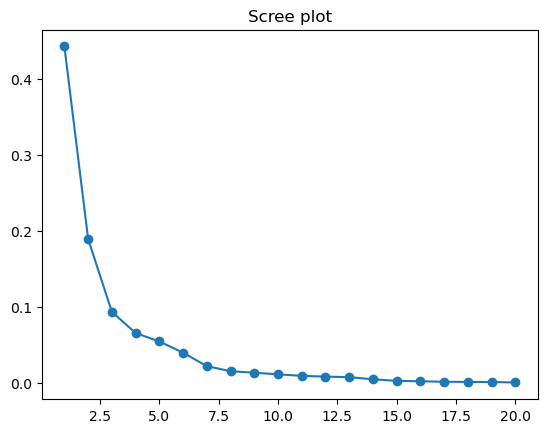

In [7]:
pca = PCA(n_components=20).fit(scaled_data)
plt.plot(np.arange(1,21), pca.explained_variance_ratio_,'o-')
plt.title('Scree plot')
plt.show()

In [9]:
Z = pca.transform(scaled_data)


<AxesSubplot: >

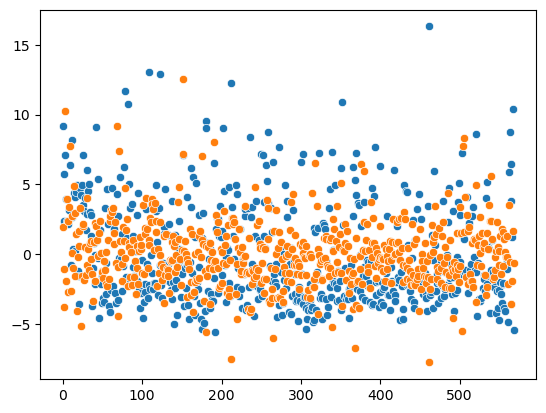

In [12]:
sns.scatterplot(Z[:,0])
sns.scatterplot(Z[:,1])

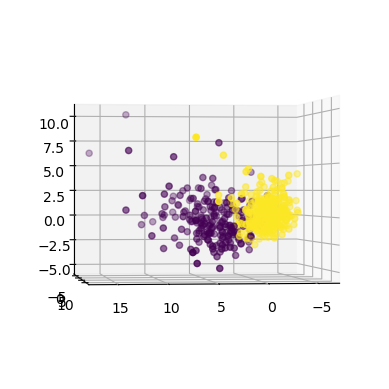

In [14]:
ax = plt.axes(projection ="3d")

ax.scatter3D(Z[:,0], Z[:,1], Z[:,2], c=data_labels)
ax.view_init(0,83)
